In [54]:
import pandas as pd 
import numpy as np 

# Зчитуємо дані з вказаного URL 
url = "https://uk.wikipedia.org/wiki/%D0%A1%D0%B5%D1%80%D0%B5%D0%B4%D0%BD%D1%8F_%D0%B7%D0%B0%D1%80%D0%BE%D0%B1%D1%96%D1%82%D0%BD%D0%B0_%D0%BF%D0%BB%D0%B0%D1%82%D0%B0_%D0%B2_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D1%96"

# Зчитуємо таблицю в DataFrame 
df = pd.read_html(url, header=0)[2] # Обираємо другий елемент списку, де знаходиться таблиця
df_1 = df.head(5)
column_name_usd = 'В доларах США'

# Виводимо перші 5 рядків таблиці 
print(df_1)

    Рік В національній валюті В доларах США  \
0  1992              5832,88▲        28,04▼   
1  1993               163533▲        36,03▲   
2  1994              1426343▲        44,99▲   
3  1995              7304000▲        49,53▲   
4  1996               125,23▼        68,45▲   

  Кількість кг хліба[20] на середню зарплату  \
0                                   1015,67▲   
1                                    430,42▼   
2                                    372,76▼   
3                                    201,76▼   
4                                    198,62▼   

  Кількість БігМаків на середню зарплату  
0                                      —  
1                                      —  
2                                      —  
3                                      —  
4                                      —  


In [55]:
# Визначаємо кількість рядків і стовпчиків за допомогою атрибуту shape
rows, columns = df.shape
print(f'Кількість рядків: {rows}')
print(f'Кількість стовпчиків: {columns}')

Кількість рядків: 32
Кількість стовпчиків: 5


In [56]:
# Отримуємо перший і останній рік з даних
first_year = int(df['Рік'].min().replace("*", ""))
last_year = int(df['Рік'].max().replace("*", ""))

# Визначаємо загальну кількість років і місяців
total_years = last_year - first_year + 1

print(f'Загальна кількість років: {total_years}')

Загальна кількість років: 32


In [57]:
df_replace = df
df_replace = df_replace.apply(lambda x: x.str.replace('-', '', regex=False) if x.dtype == 'object' else x)
print(df_replace)

      Рік В національній валюті В доларах США  \
0    1992              5832,88▲        28,04▼   
1    1993               163533▲        36,03▲   
2    1994              1426343▲        44,99▲   
3    1995              7304000▲        49,53▲   
4    1996               125,23▼        68,45▲   
5    1997               143,09▲        76,86▲   
6    1998               152,83▲        62,39▼   
7    1999               177,39▲        42,95▼   
8    2000               231,04▲        42,47▼   
9    2001               311,62▲        58,01▲   
10   2002               375,98▲        70,59▲   
11   2003               462,58▲        86,74▲   
12   2004               590,53▲       111,02▲   
13   2005               806,14▲       157,30▲   
14   2006              1042,88▲       206,51▲   
15   2007              1352,75▲       267,87▲   
16   2008              1808,92▲       343,43▲   
17   2009              1909,25▲       245,05▼   
18   2010              2246,75▲       283,12▲   
19   2011           

In [58]:
# Визначення типів стовпців
column_types = df.dtypes

# Вивід типів стовпців
print(column_types)

Рік                                           object
В національній валюті                         object
В доларах США                                 object
Кількість кг хліба[20] на середню зарплату    object
Кількість БігМаків на середню зарплату        object
dtype: object


In [59]:
# Видаляємо передостанній і останній стовпці за їх індексами
df_delete_last_two_columns = df
df_delete_last_two_columns = df_delete_last_two_columns.drop(df_delete_last_two_columns.columns[-1], axis=1)  # Видаляємо останній стовпець
df_delete_last_two_columns = df_delete_last_two_columns.drop(df_delete_last_two_columns.columns[-1], axis=1)  # Видаляємо передостанній стовпець
print(df_delete_last_two_columns)

      Рік В національній валюті В доларах США
0    1992              5832,88▲        28,04▼
1    1993               163533▲        36,03▲
2    1994              1426343▲        44,99▲
3    1995              7304000▲        49,53▲
4    1996               125,23▼        68,45▲
5    1997               143,09▲        76,86▲
6    1998               152,83▲        62,39▼
7    1999               177,39▲        42,95▼
8    2000               231,04▲        42,47▼
9    2001               311,62▲        58,01▲
10   2002               375,98▲        70,59▲
11   2003               462,58▲        86,74▲
12   2004               590,53▲       111,02▲
13   2005               806,14▲       157,30▲
14   2006              1042,88▲       206,51▲
15   2007              1352,75▲       267,87▲
16   2008              1808,92▲       343,43▲
17   2009              1909,25▲       245,05▼
18   2010              2246,75▲       283,12▲
19   2011              2639,17▲       331,24▲
20   2012              3031,92▲   

In [60]:
# Заміна нечислових значень на NaN
df_numeric = df
# Очиста непотрібних символів, які будуть заважати заміні типа даних на числовий
df_numeric = df_numeric.apply(lambda x: x.str.replace('▲', '', regex=False) if x.dtype == 'object' else x)
df_numeric = df_numeric.apply(lambda x: x.str.replace('▼', '', regex=False) if x.dtype == 'object' else x)
df_numeric = df_numeric.apply(lambda x: x.str.replace(',', '.', regex=False) if x.dtype == 'object' else x)
# Замінити всі інші нечислові значення на NaN у всій таблиці
df_numeric = df_numeric.apply(pd.to_numeric, errors='coerce')
print(df_numeric)

       Рік  В національній валюті  В доларах США  \
0   1992.0                5832.88          28.04   
1   1993.0              163533.00          36.03   
2   1994.0             1426343.00          44.99   
3   1995.0             7304000.00          49.53   
4   1996.0                 125.23          68.45   
5   1997.0                 143.09          76.86   
6   1998.0                 152.83          62.39   
7   1999.0                 177.39          42.95   
8   2000.0                 231.04          42.47   
9   2001.0                 311.62          58.01   
10  2002.0                 375.98          70.59   
11  2003.0                 462.58          86.74   
12  2004.0                 590.53         111.02   
13  2005.0                 806.14         157.30   
14  2006.0                1042.88         206.51   
15  2007.0                1352.75         267.87   
16  2008.0                1808.92         343.43   
17  2009.0                1909.25         245.05   
18  2010.0  

In [61]:
# Частка пропусків в кожній колонці
missing_percentage = (df_numeric.isnull().sum() / len(df)) * 100

# Вивід результатів
print("Частка пропусків в кожній колонці:")
print(missing_percentage)

Частка пропусків в кожній колонці:
Рік                                            6.25
В національній валюті                          0.00
В доларах США                                  0.00
Кількість кг хліба[20] на середню зарплату     0.00
Кількість БігМаків на середню зарплату        37.50
dtype: float64


In [62]:
# Заміна пропущених значень на середні значення по стовпцях
df_filled = df_numeric.fillna(df_numeric.mean())
print(df_filled)

       Рік  В національній валюті  В доларах США  \
0   1992.0                5832.88          28.04   
1   1993.0              163533.00          36.03   
2   1994.0             1426343.00          44.99   
3   1995.0             7304000.00          49.53   
4   1996.0                 125.23          68.45   
5   1997.0                 143.09          76.86   
6   1998.0                 152.83          62.39   
7   1999.0                 177.39          42.95   
8   2000.0                 231.04          42.47   
9   2001.0                 311.62          58.01   
10  2002.0                 375.98          70.59   
11  2003.0                 462.58          86.74   
12  2004.0                 590.53         111.02   
13  2005.0                 806.14         157.30   
14  2006.0                1042.88         206.51   
15  2007.0                1352.75         267.87   
16  2008.0                1808.92         343.43   
17  2009.0                1909.25         245.05   
18  2010.0  

In [63]:
# Знаходження року з найвищою зарплатою
id_of_column_salary_in_usd = 2
year_with_highest_salary_index = df_numeric[df_numeric.columns[id_of_column_salary_in_usd]].idxmax()
year_with_highest_salary = df_numeric.iat[year_with_highest_salary_index, 0]

# Отримання значення зарплати в цьому році
highest_salary = df_numeric.at[year_with_highest_salary_index, df_numeric.columns[id_of_column_salary_in_usd]]

print(f'Рік з найвищою зарплатою: {year_with_highest_salary}')
print(f'Найвища зарплата в Україні в доларах: {highest_salary} usd')

Рік з найвищою зарплатою: 2021.0
Найвища зарплата в Україні в доларах: 514.41 usd


In [64]:
id_of_column_salary_in_usd = 2
year_with_highest_salary_index = df_numeric[df_numeric.columns[id_of_column_salary_in_usd]].idxmin()
year_with_highest_salary = df_numeric.iat[year_with_highest_salary_index, 0]

# Отримання значення зарплати в цьому році
highest_salary = df_numeric.at[year_with_highest_salary_index, df_numeric.columns[id_of_column_salary_in_usd]]

print(f'Рік з найнижчою зарплатою: {year_with_highest_salary}')
print(f'Найнижчою зарплата в Україні в доларах: {highest_salary} usd')

Рік з найнижчою зарплатою: 1992.0
Найнижчою зарплата в Україні в доларах: 28.04 usd


In [65]:
# Розрахунок середньої зарплати в гривнях
average_salary_gbp = df_numeric[column_name_usd].mean()

# Вибір років, де зарплата в гривнях була вище середньої
years_above_average = df_numeric[df_numeric[column_name_usd] > average_salary_gbp]['Рік']

# Вивід років
print("Роки з зарплатою в гривнях вище середньої:")
print(years_above_average)

Роки з зарплатою в гривнях вище середньої:
15    2007.0
16    2008.0
17    2009.0
18    2010.0
19    2011.0
20    2012.0
21    2013.0
22    2014.0
25    2017.0
26    2018.0
27    2019.0
28    2020.0
29    2021.0
30       NaN
31       NaN
Name: Рік, dtype: float64


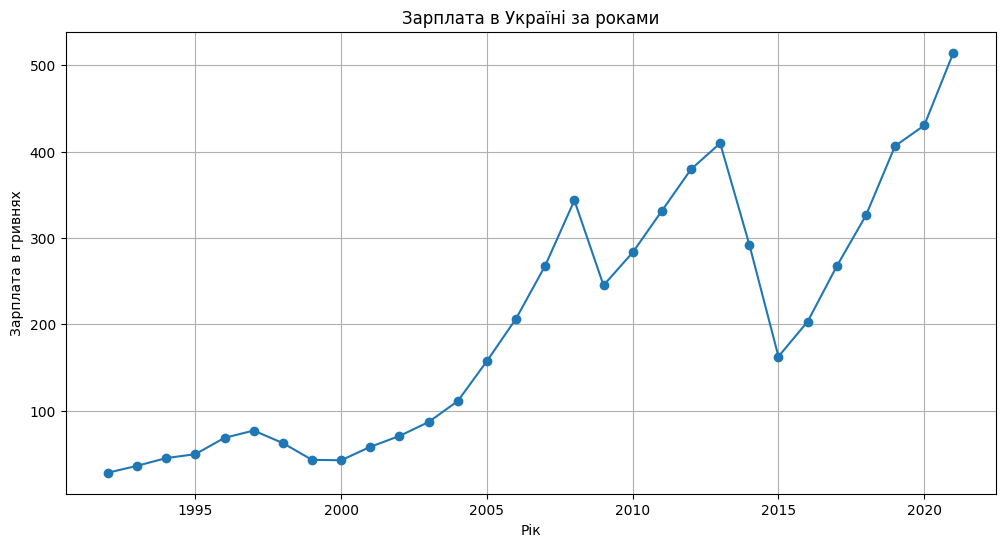

In [66]:
import matplotlib.pyplot as plt

# Визначення даних для графіка
years = df_numeric['Рік']
salaries = df_numeric[column_name_usd]

# Створення графіка
plt.figure(figsize=(12, 6))
plt.plot(years, salaries, marker='o', linestyle='-')
plt.title('Зарплата в Україні за роками')
plt.xlabel('Рік')
plt.ylabel('Зарплата в гривнях')
plt.grid(True)

# Відображення графіка
plt.show()

In [67]:
# Видалення останнього року з таблиці
df_numeric = df_numeric.drop(df_numeric.index[-1])

# Виведення оновленої таблиці
print(df_numeric)

       Рік  В національній валюті  В доларах США  \
0   1992.0                5832.88          28.04   
1   1993.0              163533.00          36.03   
2   1994.0             1426343.00          44.99   
3   1995.0             7304000.00          49.53   
4   1996.0                 125.23          68.45   
5   1997.0                 143.09          76.86   
6   1998.0                 152.83          62.39   
7   1999.0                 177.39          42.95   
8   2000.0                 231.04          42.47   
9   2001.0                 311.62          58.01   
10  2002.0                 375.98          70.59   
11  2003.0                 462.58          86.74   
12  2004.0                 590.53         111.02   
13  2005.0                 806.14         157.30   
14  2006.0                1042.88         206.51   
15  2007.0                1352.75         267.87   
16  2008.0                1808.92         343.43   
17  2009.0                1909.25         245.05   
18  2010.0  

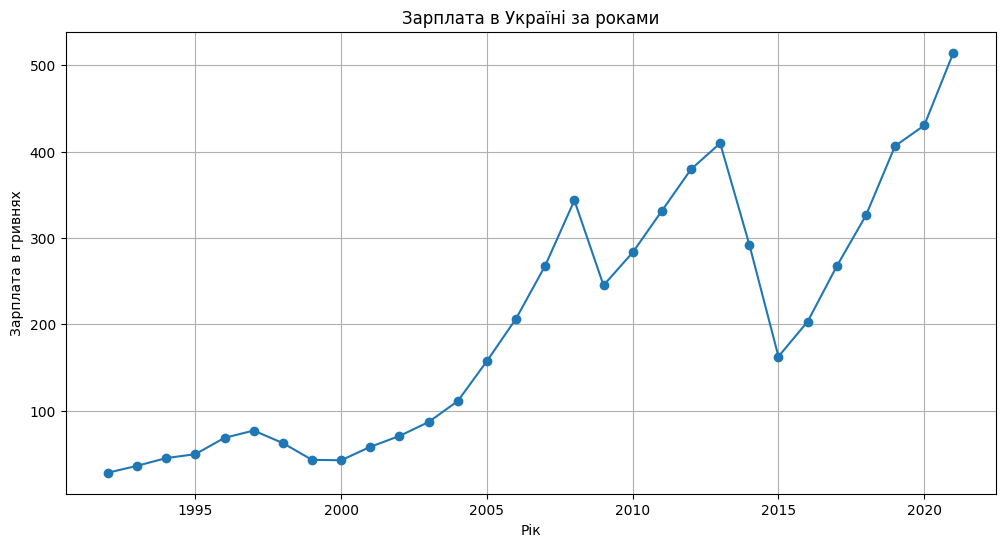

In [68]:
import matplotlib.pyplot as plt

# Визначення даних для графіка
years = df_numeric['Рік']
salaries = df_numeric[column_name_usd]

# Створення графіка
plt.figure(figsize=(12, 6))
plt.plot(years, salaries, marker='o', linestyle='-')
plt.title('Зарплата в Україні за роками')
plt.xlabel('Рік')
plt.ylabel('Зарплата в гривнях')
plt.grid(True)

# Відображення графіка
plt.show()

In [69]:
# Вибір даних за останні два роки
last_two_years = df_numeric.tail(2)[column_name_usd]

# Вибір даних за останні п'ять років
last_five_years = df_numeric.tail(5)[column_name_usd]

# Обчислення різниці між зарплатою за останніми двома та п'ятьма роками
difference = last_two_years.mean() - last_five_years.mean()

# Порівняння різниці та виведення результату
if difference > 0:
    print(f"Зарплата за останні два роки більша на {abs(difference)} usd")
elif difference < 0:
    print(f"Зарплата за останні два роки менша на {abs(difference)} usd")
else:
    print("Зарплата за останні два роки така ж, як за останні п'ять років")


Зарплата за останні два роки більша на 35.803000000000054 usd
